# Project 1: Cardio Good Fitness
**Brandy Murray** 

**May 21, 2021**

## Objective:
To extract actionable insights from the data that we have collected from the 180 customers who purchased one of three different treadmills to optimize resources and identify area of growth and improvement.  

1. Come up with a customer profile or the characteristics of a customer of the different projects.
2. Perform Uni-variate and multi-variate analysis.
3. Generate a set of insights and recommendations that will help the company in targeting new customers.

## Data: 
The data is for customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables

1. Product - the model no. of the treadmill
2. Age - in no of years, of the customer
3. Gender - of the customer
4. Education - in no. of years, of the customer
5. Marital Status - of the customer
6. Usage - Avg. # times the customer wants to use the treadmill every week
7. Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8. Income - of the customer
9. Miles- expected to run

##### Import the necessary libraries - pandas, numpy, seaborn, matplotlib.pyplot

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt  
# This adds a nice background to the graphs
sns.set(color_codes=True)
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

##### Ignore Warnings

In [2]:
import warnings
warnings.filterwarnings("ignore") 

##### Reading in the Dataset 

In [3]:
data = pd.read_csv('CardioGoodFitness.csv')

In [4]:
# copying data to another varaible to avoid any changes to original data
df = data.copy()

##### View the First Few Rows of the Dataset

In [5]:
# looking at head (5 observations) 
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


##### Check the Shape of the Dataset

In [6]:
df.shape

(180, 9)

This dataset contains 180 rows with 9 columns. 

 ##### Check the Dataframe Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Observations** 
- All columns have 180 observations indicating there are no missing values in this dataset. 
- Product and MaritalStatus is read as object but it should be read as categorical
- Gender is read as object but it should be read as binary

## Data Preprocessing

#### Feature Creation
**Creating Salary Ranges**

In [8]:
def bucket(v):
    # This is to bin the incomes together
    if v < 20000:
        return 'Low'
    if v <= 35000:
        return "Below Average"
    if v <= 50000:
        return 'Average'
    if v <= 75000:
        return 'Above Average'
    if v < 150000:
        return 'High'
    return 'Not Counted'

df['Income_Index'] = df.Income.apply(bucket)

##### Fixing the Datatypes

In [9]:
# Converting Product and MaritalStatus to a categorical variable
df['Product'] = df.Product.astype('category')
df['MaritalStatus'] = df.MaritalStatus.astype('category')
df['Income_Index'] = df.Income_Index.astype('category')

In [10]:
# Converting data of Gender to Binary Data
df_one = pd.get_dummies(df['Gender'])

# Binary Data is Concatenated into Dataframe
df_two = pd.concat((df_one, df), axis = 1)

# Gendercolumn is dropped
df_two = df_two.drop(['Gender'], axis = 1)

# We want Male=0 and Female=1 so we drop Male column
df_two = df_two.drop(['Male'], axis = 1)

# Rename the Column
df = df_two.rename(columns = {'Female': 'Gender'})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Gender         180 non-null    uint8   
 1   Product        180 non-null    category
 2   Age            180 non-null    int64   
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
 9   Income_Index   180 non-null    category
dtypes: category(3), int64(6), uint8(1)
memory usage: 9.6 KB


**Data Types of all the columns have been fixed**

In [12]:
df.describe() 
# Since I already knew there were no missing variables, I did not use include = 'all'

,Gender,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.422222,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,0.495291,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,0.000000,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,0.000000,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,0.000000,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,1.000000,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,1.000000,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Since there are no missing values that need to be taken care of this concludes the Data Preprocessing Section. 

## Exploratory Data Analysis

### Uni-Variate
While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
During the Uber Case Study we learned how to write a function that will help us create a boxplot and a histogram 
for any input numerical variable.
This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

In [14]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(# Number of rows of the subplot grid= 2 
                                           nrows = 2, 
                                           # x-axis will be shared among all subplots
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') 
    # For histogram
    sns.distplot(feature, kde=False, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) 
    # Add mean to the histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') 
    # Add median to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') 

##### Observations on Age

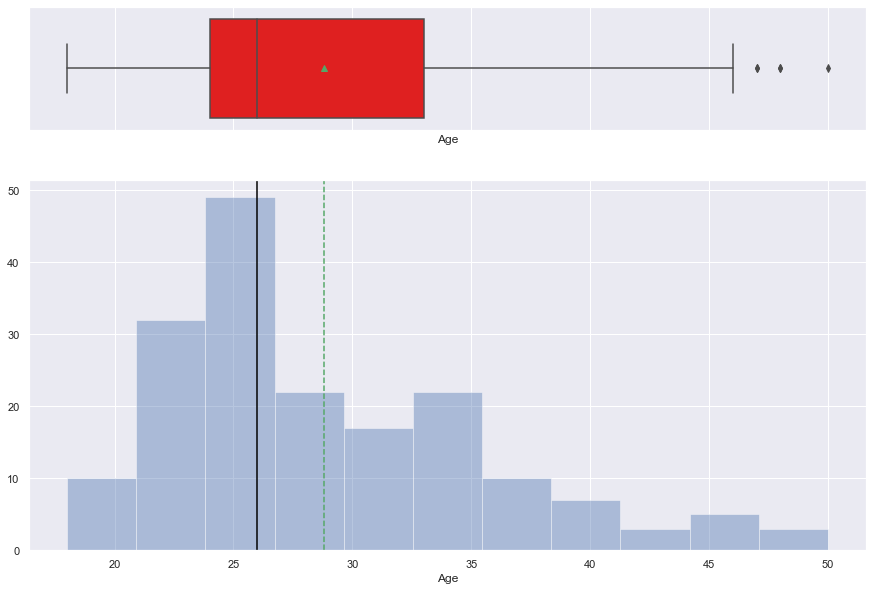

In [15]:
histogram_boxplot(df.Age)

**Observations**
- The distribution of Age is slightly right skewed. 
- The majority of purchases were made by people in their 20s.
- Median age is 26 while the mean age is 29. 
- There are only a few upper end outliers. 
- The highest age is 50 and the lowest is 18.

##### Observations of Education

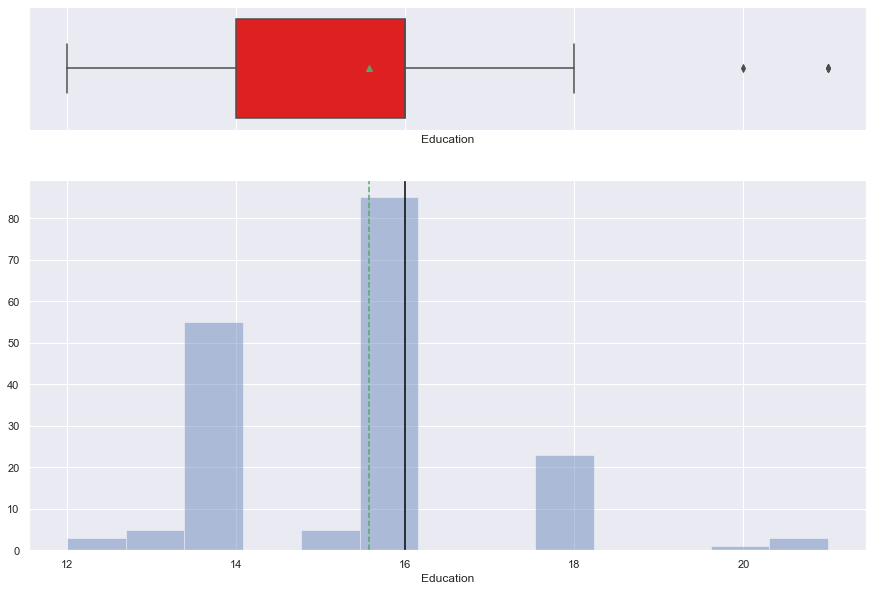

In [16]:
histogram_boxplot(df.Education)

**Observations**
- The variable Education is very close to a normal distribution even though there are some years that are not represented. 
- The majority of purchases were made by people who have obtained at least 15.5 years of education.
- Median years of education is 16 while the mean year of education is 15.5. 
- There are only a few upper end outliers. 
- The highest year of education is 21 and the lowest is 12.

##### Observations of Usage

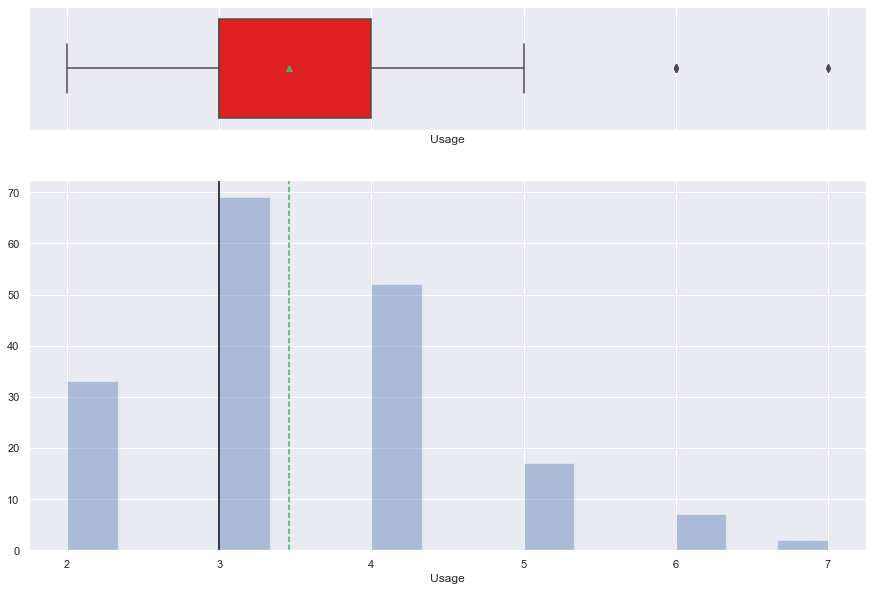

In [17]:
histogram_boxplot(df.Usage)

**Observations**
- The distribution of Usage could be considered normally distributed when looking at how close the mean and median are. However when you look at this histogram it appears to be slightly skewed to the right.  
- The majority of times customers plan to use the equipment is 3 times per week.
- Median for the planned amount of times to use per week is 3 while the mean is 3.45. 
- There are only a few upper end outliers. 
- The highest planned usage per week is 7 and the lowest is 2.

##### Observations of Fitness

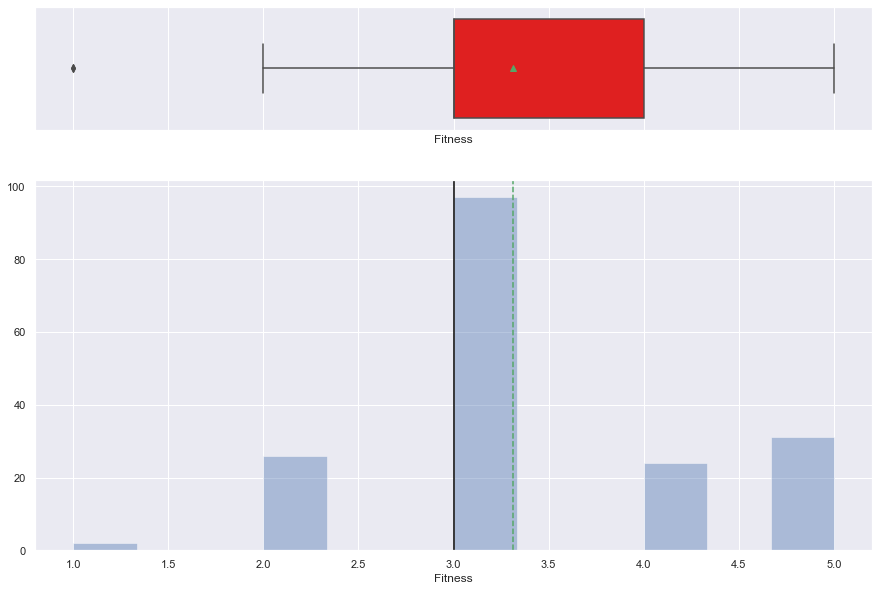

In [18]:
histogram_boxplot(df.Fitness)

**Observations**
- The variable Fitness is very close to a normal distribution even though there are some fitness levels that are not represented.  
- The majority of customers rate their fitness level at a 3 out of 5 with 5 being the highest.
- Median for rated fitness level is a 3 while the mean is 3.31. 
- There is only one lower end outlier. 
- The highest planned usage per week is 5 and the lowest is 1.

##### Observations of Income

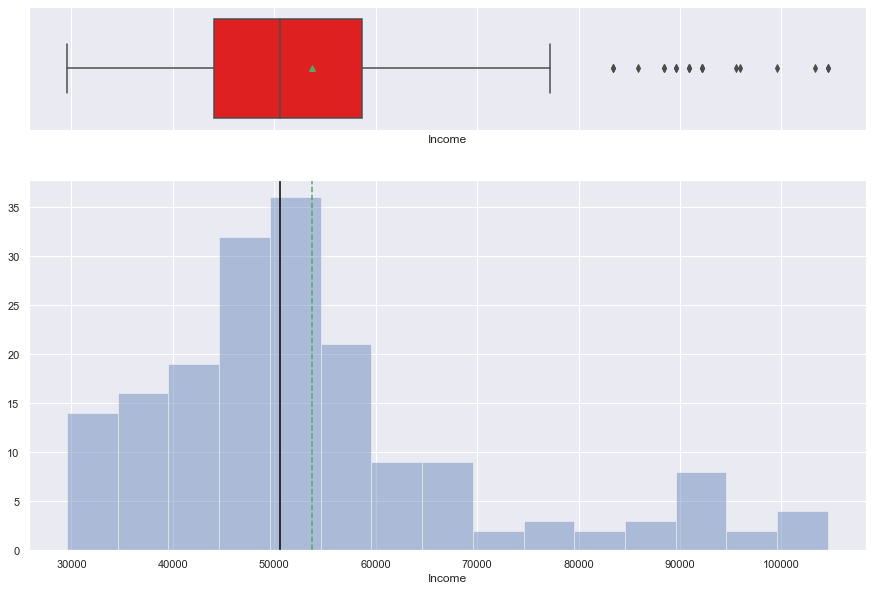

In [19]:
histogram_boxplot(df.Income)

**Observations**
- The distribution of income is normally distributed.   
- The majority of customers earn between \\$45,000 and \$55,000.
- Median for yearly income is \\$50,596.50 while the mean is \$53,719.57. 
- There are many upper end outliers which can be seen in the histogram. 
- The highest income reported is \\$104,581.00 and the lowest is \$29,562.00.

##### Observations of Miles

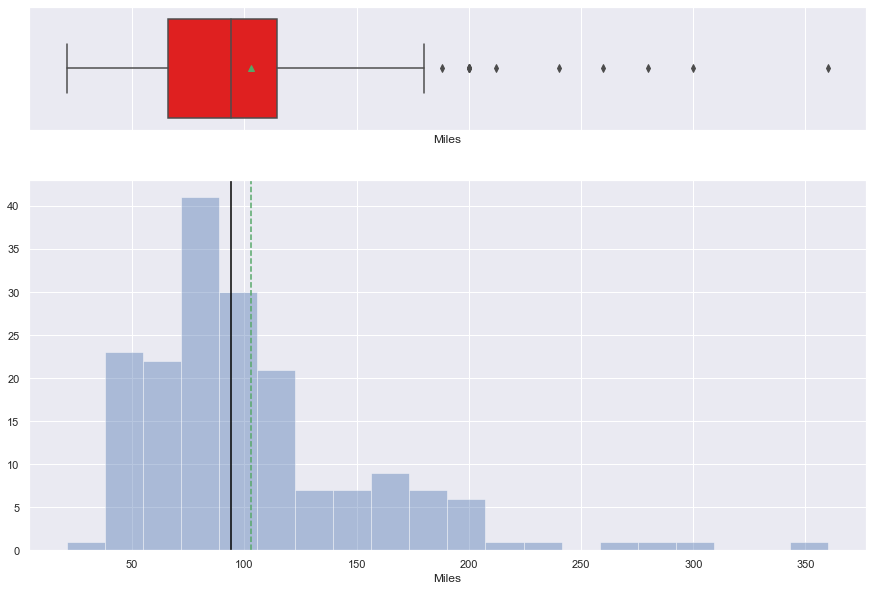

In [20]:
histogram_boxplot(df.Miles)

**Observations**
- The distribution of Miles could be considered slightly right skewed when looking at how the difference between the mean and median.   
- The majority of times customers plan to approximately 100 miles. It is unclear in the description of the data what the length of time is for this. 
- Median for the planned number of miles to run is 94 miles while the mean is 103. 
- There are only a few upper end outliers. 
- The highest planned number of miles to run is 360 and the lowest is 21.

### Exploring Categorical Variables

In [21]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    # length of the column
    total = len(feature) 
    for p in ax.patches:
        # percentage of each class of the category
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        # width of the plot
        x = p.get_x() + p.get_width() / 2 - 0.05 
        # hieght of the plot
        y = p.get_y() + p.get_height()
        # annotate the percantage
        ax.annotate(percentage, (x, y), size = 12) 

##### Observations of Product by Gender

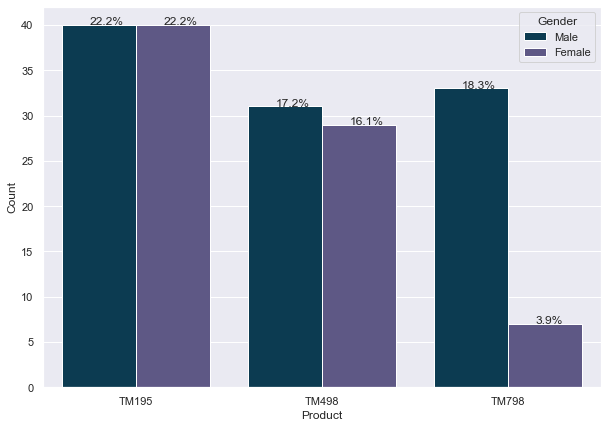

In [22]:
colors = ['#003F5C','#58508D','#BC5090','#FF6361','#FFA600']
plt.figure(figsize=(10,7))
ax = sns.countplot(x='Product', hue='Gender', data=df, palette=colors)
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])
bar_perc(ax,df['Product'])

**Observation**
- Here we can see males drastically bought more of model TM798. 
- Model TM195 was exactly the same while Males bought slightly more than females on TM498. 

##### Observations of Product by Marital Status

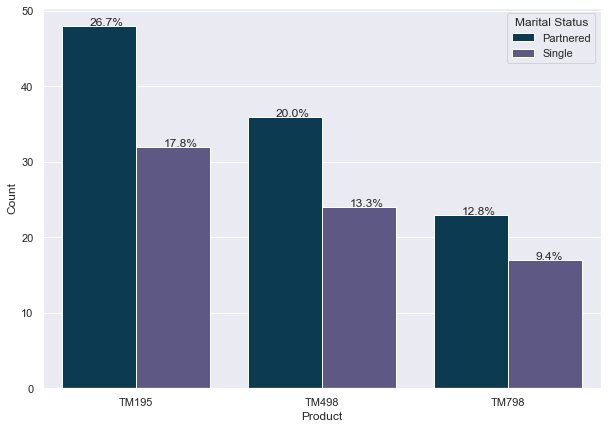

In [23]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='Product', hue='MaritalStatus', data=df, palette=colors)
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Marital Status', loc='upper right', labels=['Partnered', 'Single'])
bar_perc(ax,df['Product'])

**Observations**
- Here we see that by percentage both partnered and single people bought more of TM195.
- While single people by the least of model TM798. 

##### Observations of Marital Status by Product

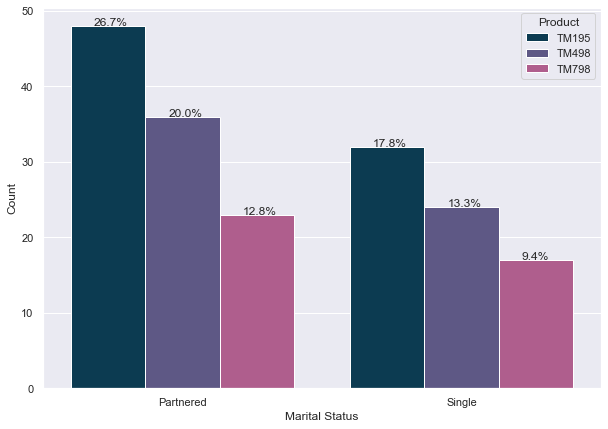

In [24]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='MaritalStatus', hue='Product', data=df, palette=colors)
plt.xlabel('Marital Status')
plt.ylabel('Count')
bar_perc(ax,df['MaritalStatus'])

**Observations**
- Both Partnered and Single status people buy all three products
- It does appear that by these parameters, partnered people buy more of all three products. 

##### Observations of Product by Income Range

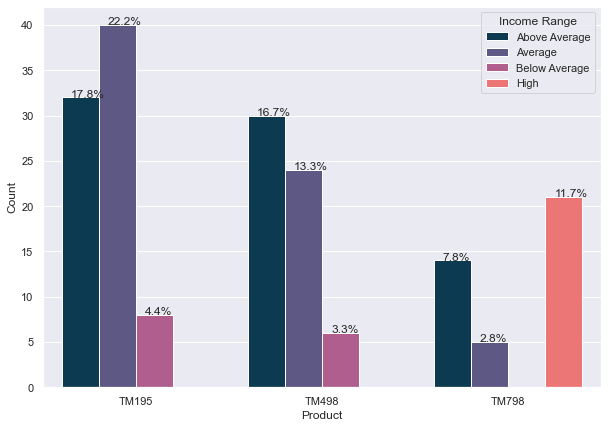

In [25]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='Product', hue='Income_Index', data=df, palette=colors)
plt.xlabel('Product')
plt.ylabel('Count')
plt.legend(title='Income Range', loc='upper right')
bar_perc(ax,df['Product'])

**Observations**
- By dividing Product up by Income Range we can see that no one with an income level Below Average bought a TM798. 
- More people making an Average or Below Average Income bought TM195.  

##### Observations of Marital Status by Income Range

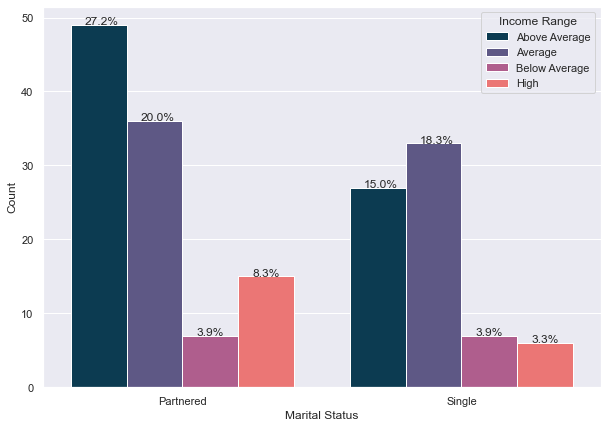

In [26]:
plt.figure(figsize=(10,7))
ax = sns.countplot(x='MaritalStatus', hue='Income_Index', data=df, palette=colors)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Income Range', loc='upper right')
bar_perc(ax,df['MaritalStatus'])

**Observations**
- Here we can see there are more higher income partner people in every income range except Below Average. 

### Bivariate Analysis
Plot bivariate charts between variables to understand their interaction with each other. 

##### Correlation

<AxesSubplot:>

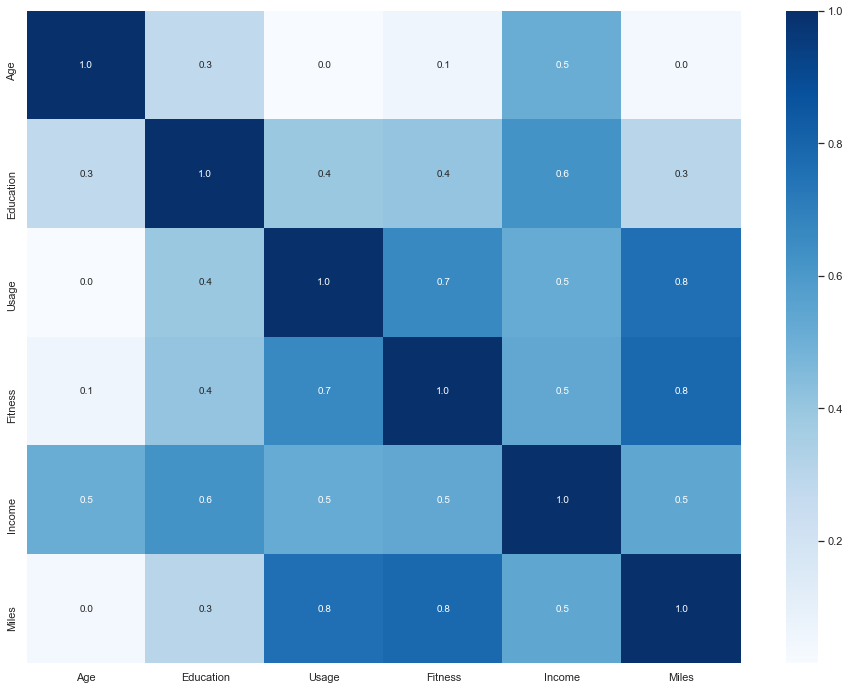

In [28]:
# Check for correlation among numerical variables
num_var = ['Age','Education','Usage','Fitness','Income','Miles']

corr = df[num_var].corr()

# plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True,cmap='Blues',
        fmt=".1f",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

**Observations**
- Usage, Fitness, and Miles all showed a high correlation to each other.  
- Education showed a somewhat high correlation with Salary at 0.6.
- It is interesting that nothing is negatively correlated with this data. 
- It is important to note that correlation does not imply causation. 

##### Bivariate Scatter Plots

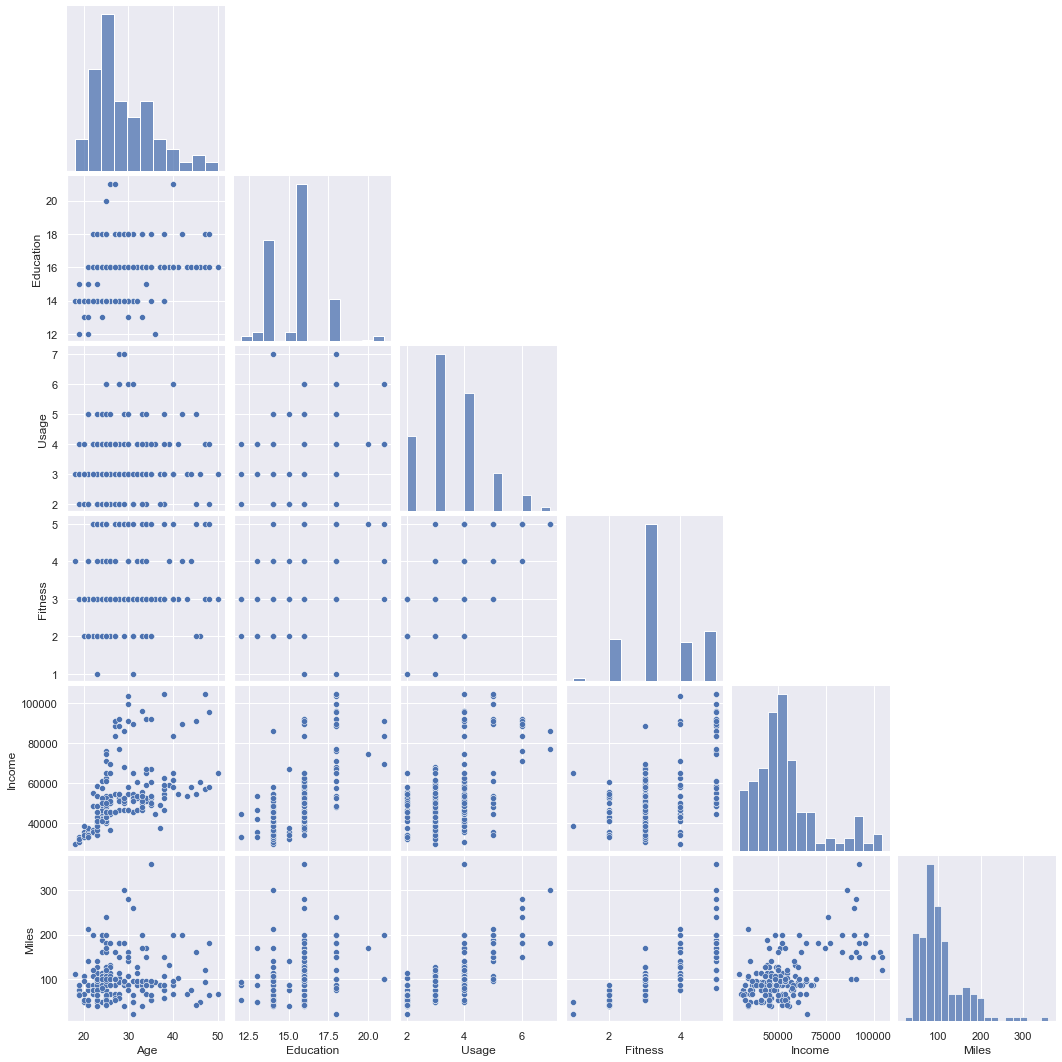

In [29]:
sns.pairplot(df[num_var], corner=True)

**Observations**
- It is more obvious in picture form there is a bit of a correlation with Age and Income, while in the correlation plot it was only a 0.5 correlation. 

##### Relationship between Fitness Level and Planned Usage variables by Gender

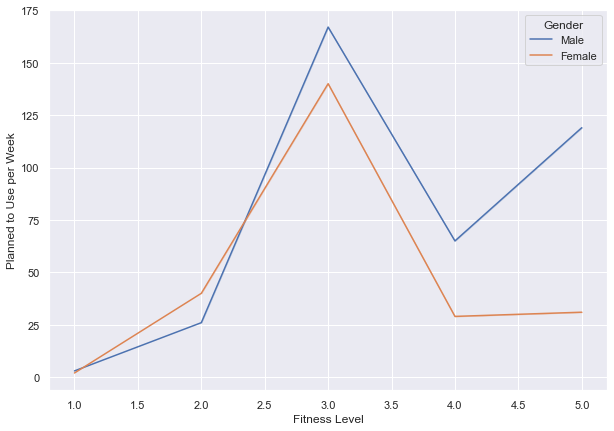

In [31]:
plt.figure(figsize=(10,7))
sns.lineplot(x="Fitness", y="Usage",data=df,ci=0,color="RED",estimator='sum', hue='Gender')
plt.ylabel('Planned to Use per Week')
plt.xlabel('Fitness Level')
plt.legend(title='Gender', loc='upper right', labels=['Male', 'Female'])

**Observations**
- Here we can see that there is a peak a sharp peak where people self-declared a fitness level of 3 and the planned number of times they will use the product with both Females and Males. 

##### Relationship between Gender and Income variables

Text(0.5, 0, 'Gender')

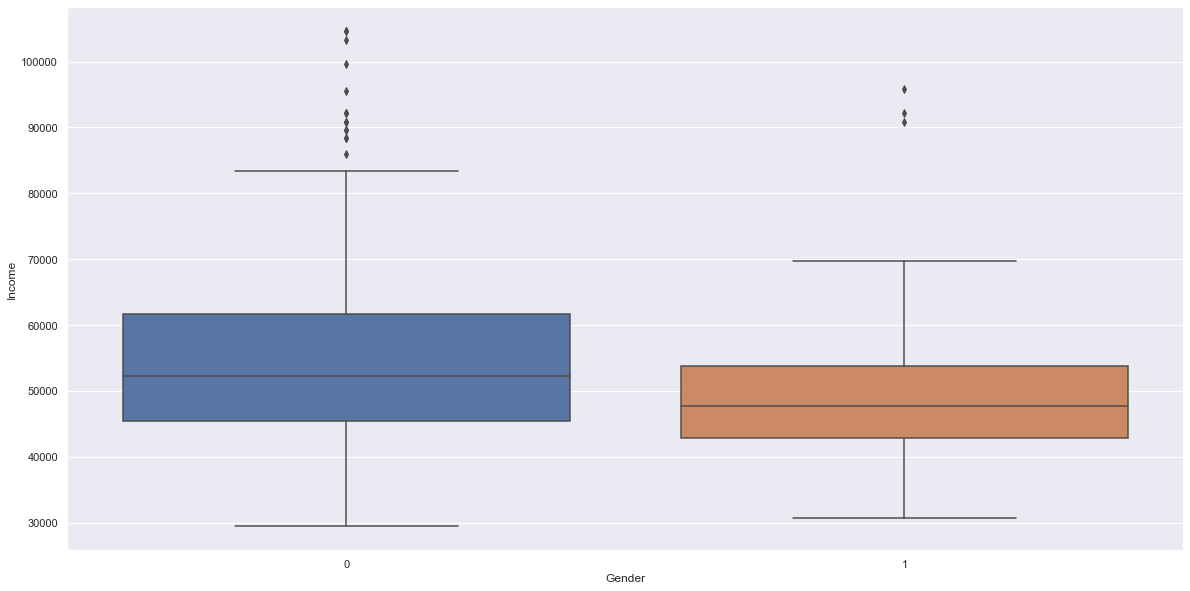

In [32]:
plt.figure(figsize=(20,10))           
sns.boxplot(x='Gender',y='Income', data = df)
plt.ylabel('Income')
plt.xlabel('Gender')

**Observations**
- This clearly shows there are more higher end outliers for the Male variable and the IQR is more dispersed than it is for Females. 

##### Relationship between Products and Income variables by Fitness Level. 

Text(0.5, 0, 'Product')

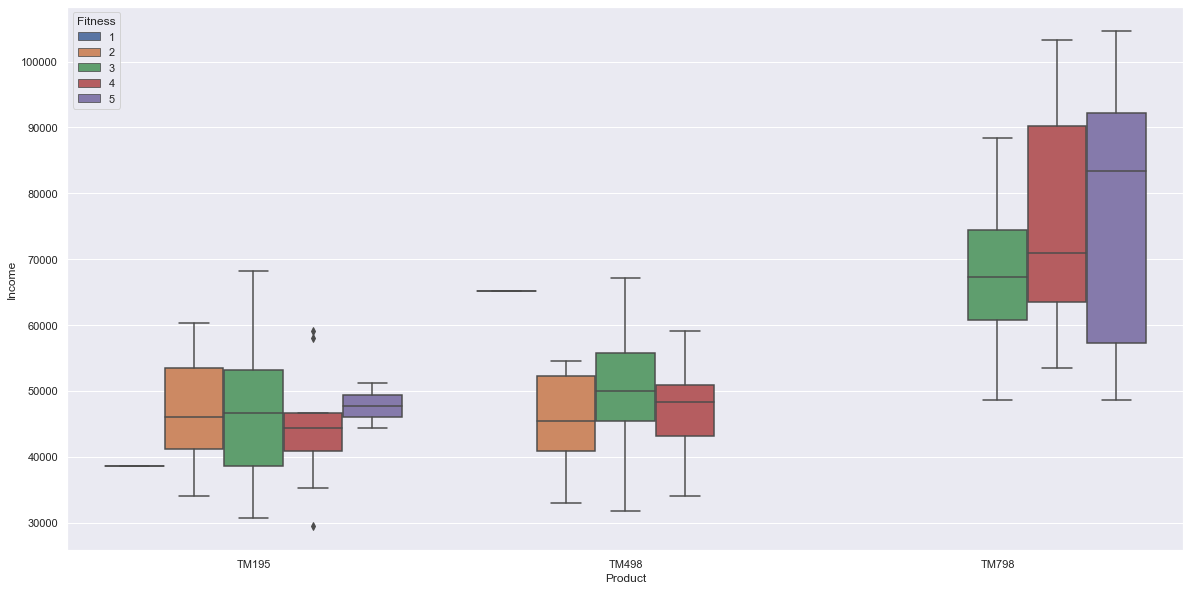

In [33]:
plt.figure(figsize=(20,10))           
sns.boxplot(x='Product',y='Income', data = df, hue='Fitness')
plt.ylabel('Income')
plt.xlabel('Product')

**Observations**
- Here we can see again that the higher the income the more likely the TM798 will be purchased.
- No one who self declared as a Fitness Level 5 bought TM498. 

##### Relationship of Education by Income

Text(0.5, 0, 'Education in Years')

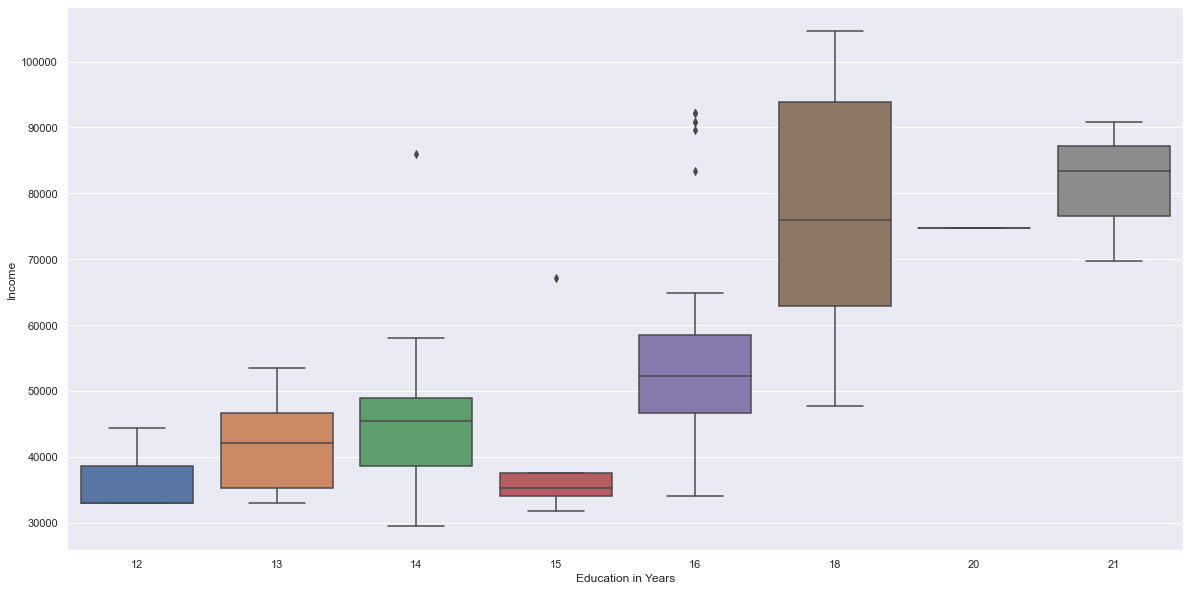

In [34]:
plt.figure(figsize=(20,10))           
sns.boxplot(x='Education',y='Income', data = df) 
plt.ylabel('Income')
plt.xlabel('Education in Years')

**Observations**
- Here we can see that people with no education past 12 years and people with 15 years of education make a similar income. 
- We can also see that people who have the most education do not have the highest income. 
- 16 years of education had the most higher end outliers. 

##### Relationship of Education and Income by Fitness Level

Text(0.5, 0, 'Education in Years')

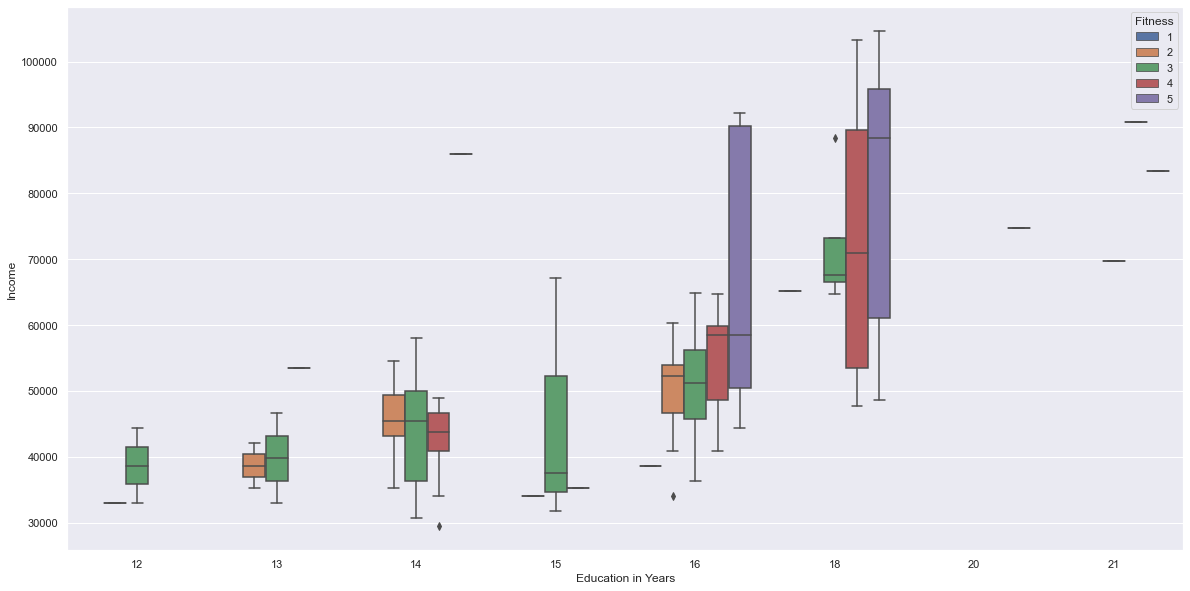

In [35]:
plt.figure(figsize=(20,10))           
sns.boxplot(x='Education',y='Income', data = df, hue = 'Fitness') 
plt.ylabel('Income')
plt.xlabel('Education in Years')

**Observations**
- It is interesting to see that the lower the education the lower the conceived fitness level.

##### Relationship of Education and Income Range by Gender

Text(0.5, 0, 'Education in Years')

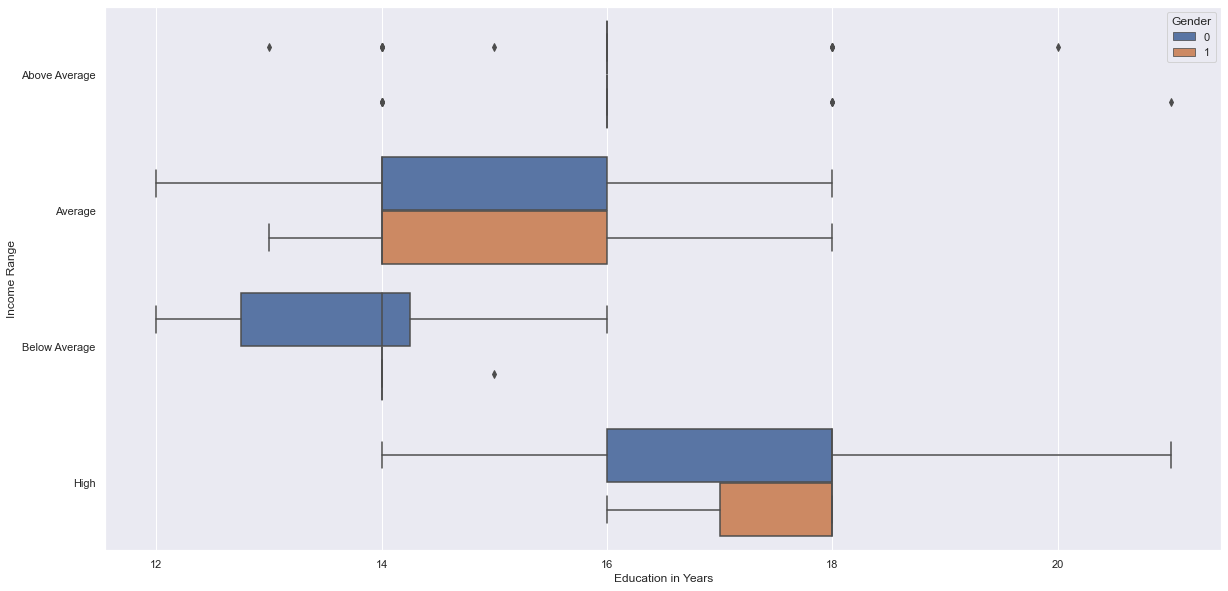

In [36]:
plt.figure(figsize=(20,10))           
sns.boxplot(x='Education',y='Income_Index', data = df, hue = 'Gender') 
plt.ylabel('Income Range')
plt.xlabel('Education in Years')

**Observations**
- Here we can see that males and females occupy each Income Level. 
- While the majority of females occupy either Average or High income levels.
- We can also see the correlation of Income Level and Number of Years of Education. 

##### Relationship of Product and Income variable by Usage

<Figure size 720x504 with 0 Axes>

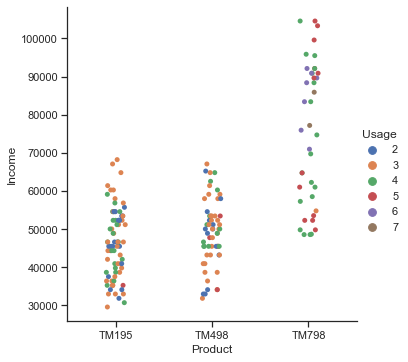

In [38]:
plt.figure(figsize=(10,7))    
sns.set_theme(style="ticks")
g = sns.catplot(x="Product", y="Income", hue="Usage", data=df)

**Observations** 
- Here we can see that people who plan to use that product more with a higher income will by TM798. 

##### Relationship of Product and Age by Fitness Level divided by Income Level. 

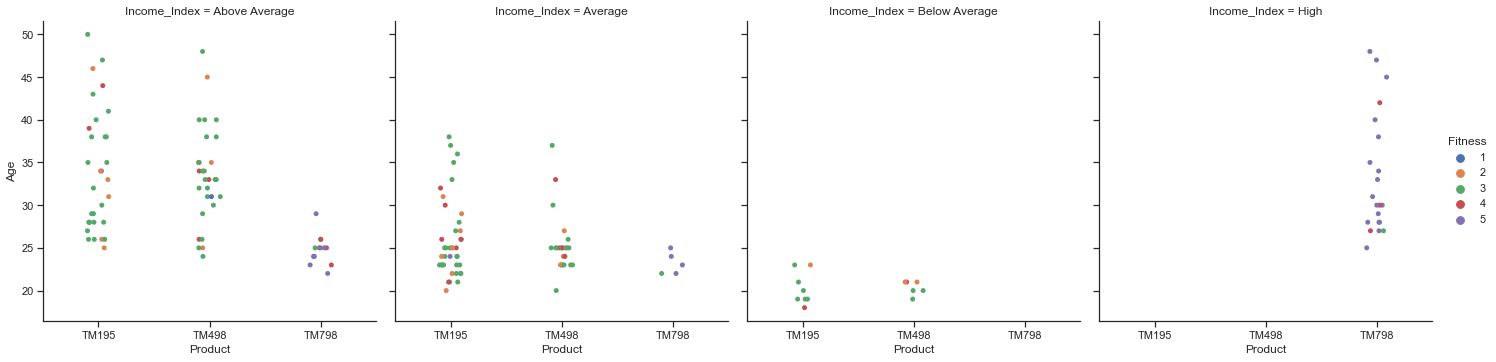

In [39]:
 sns.set_theme(style="ticks")
g = sns.catplot(x="Product", y="Age", hue="Fitness", col = "Income_Index", data=df)

**Observations**
- This further shows that people who rate themselves with a self-declared higher fitness level and higher income will buy the TM798. 
- We also see that both the TM195 and TM498 are more likely to be bought by self-declared 4 and below in the Average and Above Average Income Ranges. 
- Something we haven't seen is that the older the client the more likely they are to have at least an above average income. 

# Conclusions and Recommendations

### Conclusion
After the analysis, we have been able to conclude that

1. Product TM798 is the top model bought by older customers with higher incomes who have a perceived higher level of fitness. 

2. Product TM195 was the most frequently bought by customers who have an average or above average income, but all fitness levels were represented with this model. 

3. Product TM495 was purchased most often by younger customers that had an average perceived level of fitness. Most of the customers that purchased this model had an income of average or above average. 

### Recommendation to Business

Based on the analysis, there are following recommendations that can help the business grow:

1. Customers who have a perceived higher level of fitness, usage, and expected miles to run are more likely to buy the TM 798 model. Using a quiz to find out the best model for you, have customers understand their perceived level of activity is higher as well as their fitness. This allows them to see that a better model will last their needs longer. 

2. More males purchased treadmills than females. During high peak times of female related holidays, present a discount that attracts health and fitness to the women we love for models TM498 and TM 798.

3. To attract more single customers, we need to partner with dating apps that gives a discount on the TM195 and TM498 models. By reaching out to dating apps we are more likely to have an audience solely dedicated to the single population. 

### Further Analysis
#### Pandas Profiling
This is another way to do EDA. When exploring data, this is sometimes a good way to introduce yourself to the variables and the correlation that Pandas determines. 

In [ ]:
from pandas_profiling import ProfileReport
# Use the original dataframe, so that original features are considered
prof = ProfileReport(data)
# to view report created by pandas profile
prof

In [ ]:
# to save report obtained via pandas profiling
prof.to_file('output.html')